# Sampling Distributions Dance Party!


### Getting Started

To embark on this journey of learning and dancing, make sure you have the following prerequisites in place:

__Python Environment:__ Ensure you have a Python environment set up on your computer. If not, you can download and install Python from python.org.

__Jupyter Notebook:__ We recommend using Jupyter Notebook for a more interactive learning experience. You can install it using pip:

* Copy code:  pip install notebook

__Codecademy:__ I'd like to give special credit to Codecademy for providing this project as part of their curriculum. If you haven't already, be sure to explore their courses and resources on data science and machine learning.

__Project Data:__ Download the spotify_data.csv file provided by Codecademy. Ensure it's in the same directory as your Jupyter Notebook or Python script.

Get your dancing shoes ready! You are a DJ trying to make sure you are ready for a big party. You don’t have time to go through all the songs you can work with. Instead, you want to make sure that any sample of 30 songs from your playlist will get the party started. To do this, you will use the power of sampling distributions!

* For this project, we are going to focus on the tempo variable. This column gives the beats per minute (bpm) of each song in spotify_data.csv. The other columns in our dataset are:danceability, energy, instrumentalness, liveness, valences. For now, we are going to ignore these other columns.

In [29]:
# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [16]:
# 1: load in the spotify dataset
spotify_data = pd.read_csv("spotify_data.csv")

# 2: preview the dataset
print(spotify_data.head())

     tempo  danceability  energy  instrumentalness  liveness  valence
0  156.985         0.831   0.814          0.013400    0.0556   0.3890
1  115.080         0.719   0.493          0.000000    0.1180   0.1240
2  218.050         0.850   0.893          0.000004    0.3720   0.0391
3  186.948         0.476   0.781          0.000000    0.1140   0.1750
4  147.988         0.798   0.624          0.000000    0.1660   0.5910


In [18]:
# 3: select the relevant column
song_tempos = spotify_data.tempo

In [30]:
# Define the functions needed for sampling distributions

In [20]:
def choose_statistic(x, sample_stat_text):
  # calculate mean if the text is "Mean"
  if sample_stat_text == "Mean":
    return np.mean(x)
  # calculate minimum if the text is "Minimum"
  elif sample_stat_text == "Minimum":
    return np.min(x)
  # calculate variance if the text is "Variance"
  elif sample_stat_text == "Variance":
    return np.var(x, ddof = 1)
  # if you want to add an extra stat
  # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
  else:
    raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')

def population_distribution(population_data):
  # plot the population distribution
  sns.histplot(population_data, stat='density')
  # informative title for the distribution 
  plt.title(f"Population Distribution")
  # remove None label
  plt.xlabel('')
  plt.show()
  plt.clf()

def sampling_distribution(population_data, samp_size, stat):
  # list that will hold all the sample statistics
  sample_stats = []
  for i in range(500):
    # get a random sample from the population of size samp_size
    samp = np.random.choice(population_data, samp_size, replace = False)
    # calculate the chosen statistic (mean, minimum, or variance) of the sample
    sample_stat = choose_statistic(samp, stat)
    # add sample_stat to the sample_stats list
    sample_stats.append(sample_stat)
  
  pop_statistic = round(choose_statistic(population_data, stat),2)
  # plot the sampling distribution
  sns.histplot(sample_stats, stat='density')
  # informative title for the sampling distribution
  plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
  plt.axvline(pop_statistic,color='g',linestyle='dashed', label=f'Population {stat}')
  # plot the mean of the chosen sample statistic for the sampling distribution
  plt.axvline(np.mean(sample_stats),color='orange',linestyle='dashed', label=f'Mean of the Sample {stat}s')
  plt.legend()
  plt.show()
  plt.clf()

#### The above three functions: choose_statistic(), population_distribution(), and sampling_distribution(). 

__choose_statistic()__ allows us to choose a statistic we want to calculate for our sampling and population distributions. It contains two parameters:

* x: An array of numbers

* sample_stat_text: A string that tells the function which statistic to calculate on x. It takes on three values: “Mean”, “Minimum”, or “Variance”.

__population_distribution()__ allows us to plot the population distribution of a dataframe with one function call. It takes the following parameter:

* population_data: the dataframe being passed into the function


__sampling_distribution()__ allows us to plot a simulated sampling distribution of a statistic. The simulated sampling distribution is created by taking random samples of some size, calculating a particular statistic, and plotting a histogram of those sample statistics. It contains three parameters:

* population_data: the dataframe being sampled from
* samp_size: the size of each sample
* stat: the specific statistic being measured for each sample — either “Mean”, “Minimum”, or “Variance”

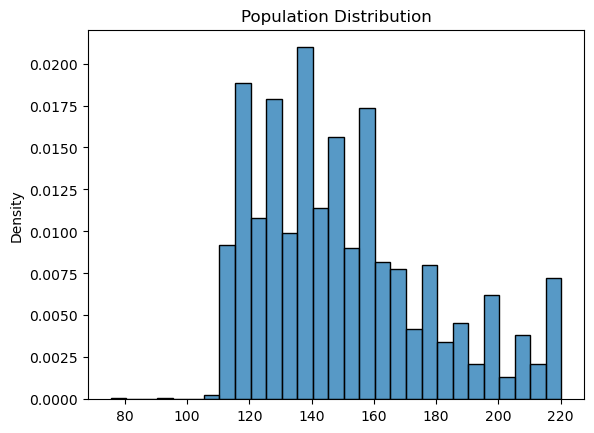

<Figure size 640x480 with 0 Axes>

In [21]:
# 5: plot the population distribution with the mean labeled
population_distribution(song_tempos)

The population distribution is approximately normal with a little bit of right-skewness.

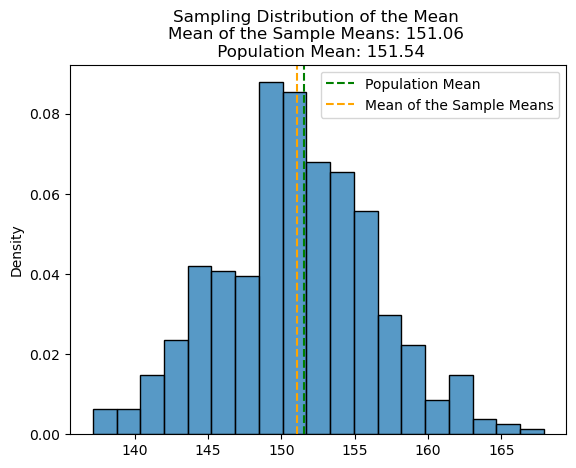

<Figure size 640x480 with 0 Axes>

In [22]:
# 6: sampling distribution of the sample mean
sampling_distribution(song_tempos, 30, "Mean")

Compare your sampling distribution of the sample means to the population mean. Is the sample mean an unbiased or biased estimator of the population?

The mean is also an unbiased estimator as the mean of the sampling distribution of the mean is always approximately the same as the population mean.

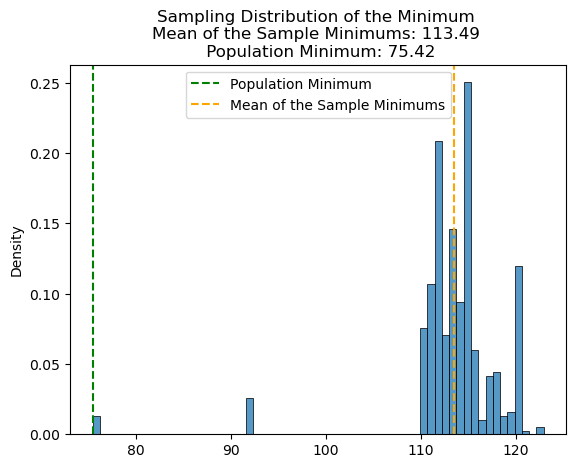

<Figure size 640x480 with 0 Axes>

In [23]:
# 8: sampling distribution of the sample minimum

sampling_distribution(song_tempos, 30, "Minimum")

Compare your sampling distribution of the sample minimums to the population minimum. Is the sample minimum an unbiased or biased estimator of the population?

Notice that the mean of the sample minimums is consistently much higher than the population minimum. Since you are looking for high-tempo songs for the party, this is actually a good thing! You will want to avoid having a lot of low-tempo songs.

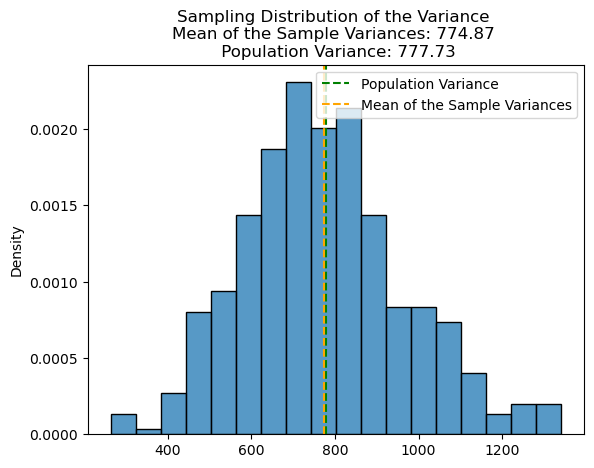

<Figure size 640x480 with 0 Axes>

In [33]:
# 10: sampling distribution of the sample variance

sampling_distribution(song_tempos, 30, "Variance")


You are afraid that if the average tempo of the songs you randomly select is less than 140bpm that your party will not be enjoyable.

Using population_mean and standard_error in a CDF, calculate the probability that the sample mean of 30 selected songs is less than 140bpm.

In [38]:
# 13: calculate the population mean and standard deviation

population_mean = round(song_tempos.mean(),3)
population_std = round(song_tempos.std(),3)
print("Population mean: ",population_mean)
print("Standard deviation: ",population_std)

Population mean:  151.535
Standard deviation:  27.888


In [39]:
# 14: calculate the standard error

standard_error = round(population_std/(30**0.5),3)
print("Standard_error: ",standard_error)


Standard_error:  5.092


In [42]:
# 15: calculate the probability of observing an average tempo of 140bpm or lower from a sample of 30 songs

probability = round(stats.norm.cdf(140, population_mean, standard_error) * 100, 3)
print("The probability of observing an average tempo of 140bpm or lower:", probability, "%")


The probability of observing an average tempo of 140bpm or lower: 1.175 %


You know the party will be truly epic if the randomly sampled songs have an average tempo of greater than 150bpm.

Using population_mean and standard_error in a CDF, calculate the probability that the sample mean of 30 selected songs is GREATER than 150bpm.

Does this probability make you feel confident about the party?

In [48]:
#  16: calculate the probability of observing an average tempo of 150bpm or higher from a sample of 30 songs

epic_probability = round((1 - stats.norm.cdf(150,population_mean,standard_error))*100,3)
print("The probability of observing an average tempo of 150bpm or higher:", epic_probability, "%")


The probability of observing an average tempo of 150bpm or higher: 61.847 %
